# ============================================
# 1. Import Libraries & Load Dataset
# ============================================

In [17]:

#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset

df = pd.read_csv('/content/drive/MyDrive/apple_products.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (62, 12)


,index,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [2]:
print(df.columns)

Index(['index', 'Product Name', 'Product URL', 'Brand', 'Sale Price', 'Mrp',
       'Discount Percentage', 'Number Of Ratings', 'Number Of Reviews', 'Upc',
       'Star Rating', 'Ram'],
      dtype='object')


# ============================================
# 3. Basic Cleaning
# ============================================

In [19]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing Sale Price (target)
df = df.dropna(subset=['Sale Price'])

# Fill numeric missing values
num_cols = ['Mrp', 'Discount Percentage', 'Number Of Ratings',
            'Number Of Reviews', 'Star Rating']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# ============================================
# 4. Clean RAM column
# ============================================

In [20]:

df['Ram'] = df['Ram'].astype(str).str.extract(r'(\d+)').astype(float)

df['Ram'] = df['Ram'].fillna(df['Ram'].median())

# ============================================
# 5. Select Features & Target
# ============================================

In [21]:

features = ['Mrp', 'Discount Percentage', 'Number Of Ratings',
            'Number Of Reviews', 'Star Rating', 'Ram']

X = df[features]
y = df['Sale Price']


# ============================================
# 6. Train-Test Split
# ============================================

In [22]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================
# 7. Scaling
# ============================================

In [23]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# 8. Train KNN Model
# ============================================

In [24]:

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

# ============================================
# 9. Predict & Evaluate
# ============================================

In [25]:
# Predict

y_pred = knn.predict(X_test_scaled)

# 10. Evaluation

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=======================")
print("     Model Results")
print("=======================")
print("RMSE:", rmse)
print("R² Score:", r2)



     Model Results
RMSE: 13324.44601244125
R² Score: 0.8839914160007518


# ============================================
# 11. Visualization 1: Actual vs Predicted
# ============================================

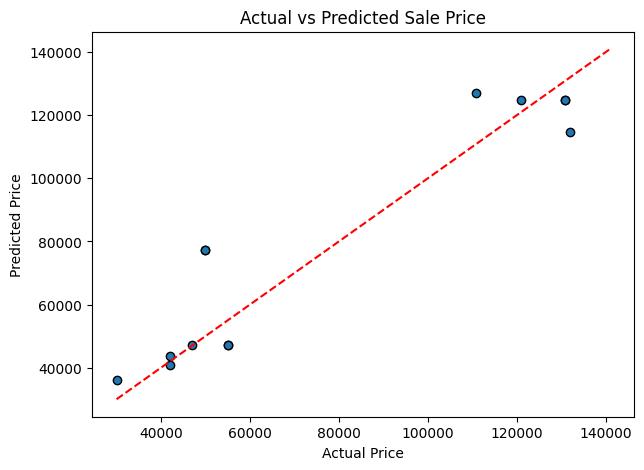

In [26]:

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, edgecolors='k')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Sale Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# ============================================
# 12. Visualization 2: Feature Correlation Heatmap
# ============================================

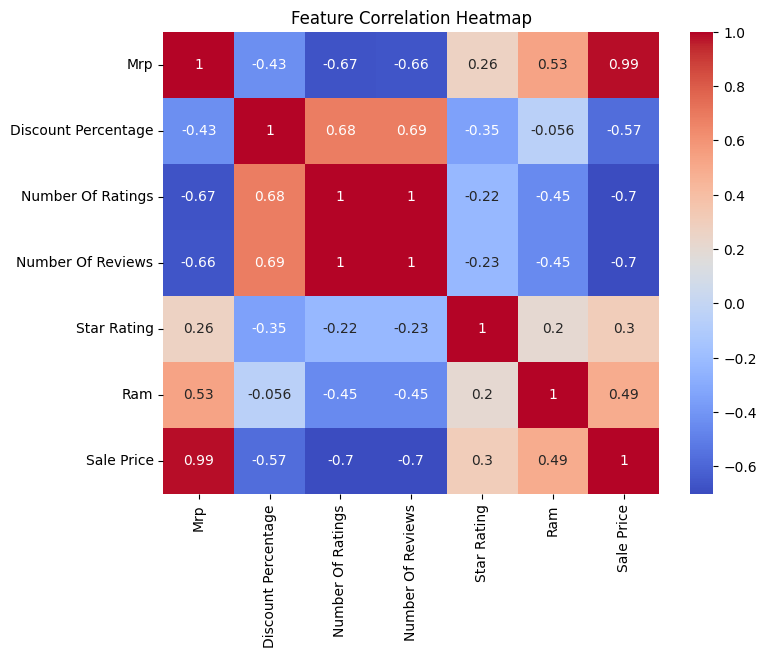

In [27]:

plt.figure(figsize=(8,6))
sns.heatmap(df[features + ['Sale Price']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# ============================================
# 13. Visualization 3: Feature Importance (KNN uses distance, not tree-based importance)
# We use correlation as proxy
# ============================================

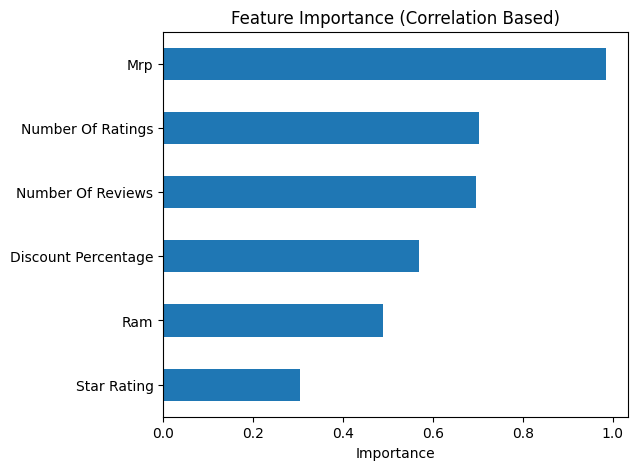

In [28]:

abs_corr = df[features].corrwith(df['Sale Price']).abs().sort_values()

plt.figure(figsize=(6,5))
abs_corr.plot(kind='barh')
plt.title("Feature Importance (Correlation Based)")
plt.xlabel("Importance")
plt.show()

# ============================================
# 14. Single Prediction Example
# ============================================

In [29]:

sample = pd.DataFrame([{
    'Mrp': 100000,
    'Discount Percentage': 25,
    'Number Of Ratings': 2500,
    'Number Of Reviews': 350,
    'Star Rating': 4.6,
    'Ram': 6
}])

sample_scaled = scaler.transform(sample)
predicted_price = knn.predict(sample_scaled)

print("\nPredicted Sale Price for sample:", predicted_price[0])


Predicted Sale Price for sample: 78519.8
